In [1]:
# This Psytrack model is GLM model that predict the evolution of the weights of 
# different predictors for the mice making a right choice. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 140

import psytrack as psy
import pandas as pd

In [3]:
df=pd.read_parquet('Total_2.parquet') # import the data

In [4]:
df_m=df[(df['subject']== 'ZFM-03061')&(df['session_num']== 10)] #select which data you want to use
df_m[['choice', 'contrastLeft', 'contrastRight']] # print only the data in which you're interested to make the analysis

,choice,contrastLeft,contrastRight
411901,1.0,-0.5,0.00
411902,-1.0,0.0,0.50
411903,-1.0,0.0,0.25
411904,-1.0,0.0,0.25
411905,-1.0,0.0,0.25
...,...,...,...
412150,0.0,0.0,0.25
412151,1.0,0.0,0.25
412152,-1.0,-1.0,0.00
412153,-1.0,0.0,1.00


In [5]:
# Create the input dictionary: 
    # y is the animal's choice. In the IBL task, it's 1 making the right choice and 2 making the left 
                            # choice. 
                            # In the GitHub example of Psytrack, they are using another task 
                            # (sound descrimination), in their task, 1 is making the Left choice 
                            # and 2 is making the right choice.
    # the inputs values: 
        # s1 is the value of the right contrast whilst s2 is the value of the left contrast.
        # Both of these values are positive & they are shaped in a 2D array. 

In [6]:
input={
    'y': np.array([2 if c < 0 else 1 for c in df_m['choice']]), 
    'inputs': {
        's1': np.abs(df_m['contrastRight']).values.reshape(-1, 1),
        's2': np.abs(df_m['contrastLeft']).values.reshape(-1, 1)
            }
    }


In [7]:
# Create your weights, here bias is the bias weight, s1 is the weight of the right contrast 
# whereas s2 is the weight of the left contrast. 

In [8]:
weights = {'bias': 1,  # a special key
           's1': 1,
           's2': 1
           } 

# It is often useful to have the total number of weights K in your model
K = np.sum([weights[i] for i in weights.keys()])

In [9]:
# define the hyperparameters: 
# sigInit ==> sigma initiated 
# sigma ==> how the weights can evoluate 
# sigDay ==> allows the weights to jump at specific time points (here we're going to put 
            # sigDay on the changes of bias mode.

In [10]:
hyper= {'sigInit': 2**4.,      # Set to a single, large value for all weights. Will not be optimized further.
       'sigma': [2**-6]*K
       }

In [11]:
optList = ['sigma']

In [12]:
# Psytrack function 
hyp, evd, wMode, hess_info = psy.hyperOpt(input, hyper, weights, optList)

In [13]:
wMode

array([[ 2.00168923e-01,  2.01855567e-01,  2.01232326e-01,
         1.96786441e-01,  1.88505938e-01,  1.76368472e-01,
         1.68048625e-01,  1.48556827e-01,  1.30674832e-01,
         1.13002790e-01,  9.89026889e-02,  8.62671898e-02,
         7.38156431e-02,  6.27740621e-02,  5.31245360e-02,
         4.08690385e-02,  2.43461983e-02,  9.17400830e-03,
        -2.71807968e-03, -1.44378699e-02, -2.70324956e-02,
        -2.95545894e-02, -3.48593550e-02, -3.01087665e-02,
        -2.98306103e-02, -4.09986267e-02, -5.49743655e-02,
        -5.89389602e-02, -6.57507857e-02, -7.24093835e-02,
        -7.89232830e-02, -8.24442761e-02, -9.05913138e-02,
        -9.76251046e-02, -1.07592543e-01, -1.20516257e-01,
        -1.33329033e-01, -1.46035435e-01, -1.63557798e-01,
        -1.80982519e-01, -1.99428082e-01, -2.17784285e-01,
        -2.35261552e-01, -2.52656336e-01, -2.71141626e-01,
        -2.81975708e-01, -2.90460521e-01, -2.89489240e-01,
        -2.93773364e-01, -2.99189877e-01, -2.97042283e-0

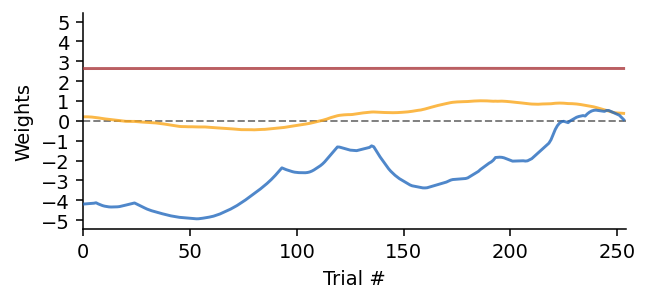

In [14]:
# Psytrack plot
fig = psy.plot_weights(wMode, weights)